In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f


In [17]:
"""
Распределения случайных величин:

    ξ₁ ~ (a₁, φ₁²),     η₁ ~ (b₁, ψ₁²)
    ξ₂ ~ (a₂, φ₂²),     η₂ ~ (b₂, ψ₂²)

Гипотезы:
    H₀: φ₁² = ψ₁²  и  φ₂² = ψ₂²    
    H₁: φ₁² ≠ ψ₁²  или φ₂² ≠ ψ₂²    

Уровень значимости:
    α = 0.05
"""


"""
Если H₀ верна, то:

    S_{x₁}² / S_{y₁}²  ~  F(n - 1, m - 1)
    S_{x₂}² / S_{y₂}²  ~  F(n - 1, m - 1)

То есть отношения выборочных дисперсий подчиняются F-распределению
с (n - 1, m - 1) степенями свободы.
"""

'\nЕсли H₀ верна, то:\n\n    S_{x₁}² / S_{y₁}²  ~  F(n - 1, m - 1)\n    S_{x₂}² / S_{y₂}²  ~  F(n - 1, m - 1)\n\nТо есть отношения выборочных дисперсий подчиняются F-распределению\nс (n - 1, m - 1) степенями свободы.\n'

In [11]:
sd_length_A, sd_length_B = 5.722, 6.161
sd_width_A, sd_width_B   = 4.612, 5.055

n_A, n_B = 139, 1000

F_val_length = (sd_length_A ** 2) / (sd_length_B ** 2)
F_val_width  = (sd_width_A ** 2)  / (sd_width_B ** 2)

alpha_level = 0.05
df_A, df_B = n_A - 1, n_B - 1

F_lower = f.ppf(alpha_level / 2, df_A, df_B)
F_upper = f.ppf(1 - alpha_level / 2, df_A, df_B)

print(f"F-статистика для длины: {F_val_length:.3f}")
print(f"F-статистика для ширины:  {F_val_width:.3f}")
print(f"Критические границы: [{F_lower:.3f}, {F_upper:.3f}]")

F-статистика для длины: 0.863
F-статистика для ширины:  0.832
Критические границы: [0.767, 1.272]


In [12]:
p_val_length = f.sf(F_val_length, df_A, df_B)
p_val_width  = f.sf(F_val_width, df_A, df_B)

print(f"p-value (длина) = {p_val_length}")
print(f"p-value (ширина)  = {p_val_width}")

p-value (длина) = 0.8635945115489605
p-value (ширина)  = 0.9134225454551342


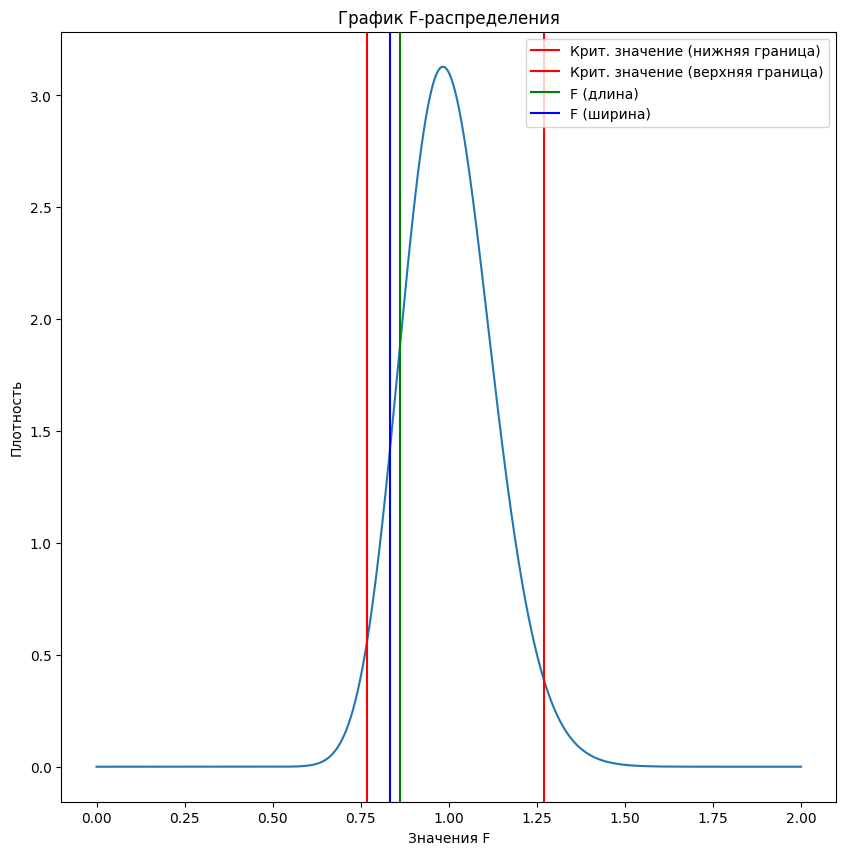

In [13]:
x_vals = np.linspace(0, 2, 10000)
pdf_vals = f.pdf(x_vals, df_A, df_B)

plt.figure(figsize=(10, 10))
plt.plot(x_vals, pdf_vals)
plt.axvline(x=F_lower, color="red", label="Крит. значение (нижняя граница)")
plt.axvline(x=F_upper, color="red", label="Крит. значение (верхняя граница)")
plt.axvline(x=F_val_length, color="green", label="F (длина)")
plt.axvline(x=F_val_width, color="blue", label="F (ширина)")
plt.title("График F-распределения")
plt.xlabel("Значения F")
plt.ylabel("Плотность")
plt.legend()
plt.show()

### $$\frac{\alpha}{2} \le p\_value\_length \le 1 - \frac{\alpha}{2}\ \ \ \ \land\ \ \ \frac{\alpha}{2} \le p\_value\_width \le 1 - \frac{\alpha}{2}$$
## $$ \Longrightarrow нет\ оснований\ отвергнуть\ H_0$$

# W
# $$ W = 1 - P(u_{\frac{\alpha}{2}} \le x \le u_{1 - \frac{\alpha}{2}}) $$

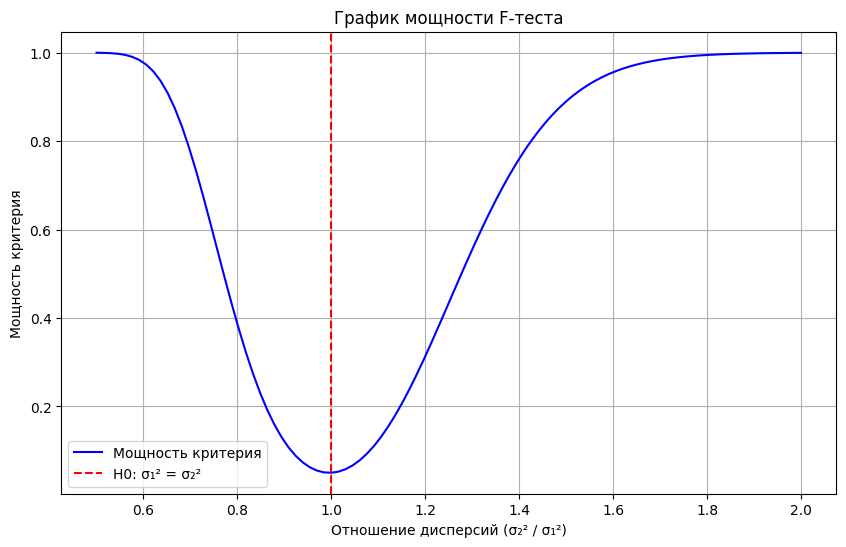

In [14]:
lambda_range = np.linspace(0.5, 2, 100) 
power_values = 1 - f.cdf(F_upper, df_A, df_B, scale=lambda_range) + \
               f.cdf(F_lower, df_A, df_B, scale=lambda_range)

plt.figure(figsize=(10, 6))
plt.plot(lambda_range, power_values, label="Мощность критерия", color="blue")
plt.axvline(x=1, color="red", linestyle="--", label="H0: σ₁² = σ₂²")
plt.xlabel("Отношение дисперсий (σ₂² / σ₁²)")
plt.ylabel("Мощность критерия")
plt.title("График мощности F-теста")
plt.legend()
plt.grid()
plt.show()